In [1]:
from experiment.scenario import *
from pathlib import Path
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from experiment.utils import scan_freq_from_pulse_freq_via_point_spacing, point_spacing_along, point_spacing_across, rms

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# Experiment Test Case Delft Large

In [2]:
from experiment_setup.exp_delft_large import *

In [3]:
e.setup()

In [4]:
e.run_step(Scenario.setup_survey)

Running 'setup_survey' for scenario_000 ...

Finished 'setup_survey' for scenario_000 after 0:00:00.

Running 'setup_survey' for scenario_001 ...

Finished 'setup_survey' for scenario_001 after 0:00:00.

Running 'setup_survey' for scenario_002 ...

Finished 'setup_survey' for scenario_002 after 0:00:00.

Running 'setup_survey' for scenario_003 ...

Finished 'setup_survey' for scenario_003 after 0:00:00.

Running 'setup_survey' for scenario_004 ...

Finished 'setup_survey' for scenario_004 after 0:00:00.

Running 'setup_survey' for scenario_005 ...

Finished 'setup_survey' for scenario_005 after 0:00:00.

Running 'setup_survey' for scenario_006 ...

Finished 'setup_survey' for scenario_006 after 0:00:00.

Running 'setup_survey' for scenario_007 ...

Finished 'setup_survey' for scenario_007 after 0:00:00.

Running 'setup_survey' for scenario_008 ...

Finished 'setup_survey' for scenario_008 after 0:00:00.

Running 'setup_survey' for scenario_009 ...

Finished 'setup_survey' for scenario_

In [5]:
scenarios_unique_surveys = [f"scenario_{(i*5):03}" for i in range(5)]
print(scenarios_unique_surveys)
# scenarios_unique_surveys = None

['scenario_000', 'scenario_005', 'scenario_010', 'scenario_015', 'scenario_020']


In [6]:
e.run_step(Scenario.prepare_survey, scenarios=scenarios_unique_surveys)

Running 'prepare_survey' for scenario_000 ...

Finished 'prepare_survey' for scenario_000 after 0:00:00.011001.

Running 'prepare_survey' for scenario_005 ...

Finished 'prepare_survey' for scenario_005 after 0:00:00.004997.

Running 'prepare_survey' for scenario_010 ...

Finished 'prepare_survey' for scenario_010 after 0:00:00.005001.

Running 'prepare_survey' for scenario_015 ...

Finished 'prepare_survey' for scenario_015 after 0:00:00.006006.

Running 'prepare_survey' for scenario_020 ...

Finished 'prepare_survey' for scenario_020 after 0:00:00.004994.



In [7]:
e.run_step(Scenario.run_survey, scenarios=scenarios_unique_surveys[0])

Running 'run_survey' for scenario_000 ...

Building survey simulation ...
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 54.61301100000128 seconds
Starting survey simulation ...
Survey simulation running. Time elapsed: 99 s
Survey simulation has finished after 0:01:39.
Reading the coordinates in which the trajectories are parallel ...
Computing center coordinates between adjacent parallel trajectory coordinates ...
Reading input point clouds and computing within-cloud nearest-neighbor distance ...
Processing swath point cloud 1 of 5 ...
- Processed 573580 points.
Processing swath point cloud 2 of 5 ...
- Processed 602425 points.
Processing swath point cloud 3 of 5 ...
- Processed 611187 points.
Processing swath point cloud 4 of 5 ...
- Processed 605777 points.
Processing swath point cloud 5 of 5 ...
- Processed 576871 points.
Computing mean within-cloud nearest-neighbor distances ...
[0.9020465924962655, 0.9195912365749528, 0.929179728595586, 0.92802

In [8]:
e.run_step(Scenario.run_survey, scenarios=scenarios_unique_surveys[4])

Running 'run_survey' for scenario_020 ...

Building survey simulation ...
SimulationBuilder is building simulation ...
SimulationBuilder built simulation in 31.211027400000603 seconds
Starting survey simulation ...
Survey simulation running. Time elapsed: 2255 s
Survey simulation has finished after 0:37:35.
Reading the coordinates in which the trajectories are parallel ...
Computing center coordinates between adjacent parallel trajectory coordinates ...
Reading input point clouds and computing within-cloud nearest-neighbor distance ...
Processing swath point cloud 1 of 5 ...
- Processed 9182019 points.
Processing swath point cloud 2 of 5 ...
- Processed 9647757 points.
Processing swath point cloud 3 of 5 ...
- Processed 9784451 points.
Processing swath point cloud 4 of 5 ...
- Processed 9695345 points.
Processing swath point cloud 5 of 5 ...
- Processed 9235427 points.
Computing mean within-cloud nearest-neighbor distances ...
[0.22591532089482433, 0.23230509469280855, 0.23458360370796

In [ ]:
e.run_step(Scenario.process_point_cloud, scenarios=scenarios_unique_surveys[0])

In [ ]:
e.run_step(Scenario.setup_reconstruction, scenarios=scenarios_unique_surveys[0])

In [ ]:
e.run_step(Scenario.prepare_reconstruction, scenarios=scenarios_unique_surveys[0])

In [ ]:
e.run_step(Scenario.run_reconstruction, scenarios=scenarios_unique_surveys[0])

In [9]:
e.run_step(Scenario.setup_evaluation, scenarios=scenarios_unique_surveys[4])

Running 'setup_evaluation' for scenario_020 ...

Text file containing path to final processed point cloud does not exist.


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Florian\\Data\\city-to-scan-to-city\\Experiments\\experiment_test_case_delft_large_5x5\\05_point_clouds\\scenario_020\\final_cloud_filepath.txt'

In [ ]:
e.run_step(Scenario.run_evaluation, scenarios=scenarios_unique_surveys[4], evaluator_selection="point_density")

# Experiment Test Case with Random Error

**Update: Independent ALS simulation and random error introduction**

Updated folder structure:

- 01_input
- 02_settings
- 03_scene
- 04_survey
- 05_point_clouds
- 06_reconstruction
- 07_evaluation

One settings dictionary vs. two settings dictionaries?

One dictionary:

- Explicitly states the survey settings (mainly pulse frequency) for each scenario, even if they repeat
- Requires parsing of the contained survey settings to ensure that surveys with identical settings are only simulated once
- Allows identification of each scenario's settings at a single glance, without referencing settings from a second dictionary
- More verbose, but simpler structure

Two dictionaries:

- No need to repeat identical pulse frequencies for multiple scenarios, instead add reference to corresponding survey setting
- No need to parse the scenario dictionary to identify unique survey settings
- To get complete settings for single scenario including its survey settings, the reference to the second dictionary must be dissolved
- Less verbose, but more complicated structure for the user to set up


In [2]:
from experiment_setup.exp_random_error import *

In [3]:
# for i, s in enumerate(scenario_settings):
#     print(i)
#     print(point_spacing_along(velocity, s["scan_freq_hz"]))
#     print(point_spacing_across(altitude, scan_angle_deg, s["pulse_freq_hz"], s["scan_freq_hz"]))
#     print()

## Reconstruction

In [3]:
e.setup()

In [12]:
e.run_step(Scenario.setup_reconstruction, scenarios="scenario_005")

Running 'setup_reconstruction' for scenario_005 ...

Finished 'setup_reconstruction' for scenario_005 after 0:00:00.000998.



In [17]:
e.run_step(Scenario.prepare_reconstruction, scenarios="scenario_005")

Running 'prepare_reconstruction' for scenario_005 ...

Finished 'prepare_reconstruction' for scenario_005 after 0:00:00.008002.



In [18]:
e.run_step(Scenario.run_reconstruction, scenarios="scenario_005")

Running 'run_reconstruction' for scenario_005 ...

Starting 3D building reconstruction ...
- Command: geof C:/Users/Florian/Data/city-to-scan-to-city/Experiments/experiment_test_case_random_error_5x5/06_reconstruction/scenario_005/reconstruct.json --verbose --workdir --config C:/Users/Florian/Data/city-to-scan-to-city/Experiments/experiment_test_case_random_error_5x5/06_reconstruction/scenario_005/config.toml
- Output log file: C:\Users\Florian\Data\city-to-scan-to-city\Experiments\experiment_test_case_random_error_5x5\06_reconstruction\scenario_005\geoflow_log_240802-161247.txt


Finished 3D building reconstruction.
Finished 'run_reconstruction' for scenario_005 after 0:00:08.428078.



## Evaluation

In [3]:
e.setup()
e.run_step(Scenario.setup_evaluation)

Running 'setup_evaluation' for scenario_000 ...

Finished 'setup_evaluation' for scenario_000 after 0:00:00.160051.

Running 'setup_evaluation' for scenario_001 ...

Finished 'setup_evaluation' for scenario_001 after 0:00:00.043005.

Running 'setup_evaluation' for scenario_002 ...

Finished 'setup_evaluation' for scenario_002 after 0:00:00.047012.

Running 'setup_evaluation' for scenario_003 ...

Finished 'setup_evaluation' for scenario_003 after 0:00:00.067531.

Running 'setup_evaluation' for scenario_004 ...

Finished 'setup_evaluation' for scenario_004 after 0:00:00.056533.

Running 'setup_evaluation' for scenario_005 ...

Finished 'setup_evaluation' for scenario_005 after 0:00:00.055001.

Running 'setup_evaluation' for scenario_006 ...

Finished 'setup_evaluation' for scenario_006 after 0:00:00.050524.

Running 'setup_evaluation' for scenario_007 ...

Finished 'setup_evaluation' for scenario_007 after 0:00:00.055014.

Running 'setup_evaluation' for scenario_008 ...

Finished 'setup

In [5]:
e.run_step(Scenario.run_evaluation, evaluator_selection="height")

Running 'run_evaluation' for scenario_000 ...

Starting HeightEvaluator ...

Loading CityJSON files ...
Reading building heights from output CityJSON file ...
Reading building heights from input CityJSON file ...
Computing building height differences ...
Finished HeightEvaluator.

Finished 'run_evaluation' for scenario_000 after 0:00:04.438507.

Running 'run_evaluation' for scenario_001 ...

Starting HeightEvaluator ...

Loading CityJSON files ...
Reading building heights from output CityJSON file ...
Reading building heights from input CityJSON file ...
Computing building height differences ...
Finished HeightEvaluator.

Finished 'run_evaluation' for scenario_001 after 0:00:03.396684.

Running 'run_evaluation' for scenario_002 ...

Starting HeightEvaluator ...

Loading CityJSON files ...
Reading building heights from output CityJSON file ...
Reading building heights from input CityJSON file ...
Computing building height differences ...
Finished HeightEvaluator.

Finished 'run_evaluati

In [4]:
e.compute_summary_statistics()

In [5]:
e.run_step(Scenario.concat_evaluation_results)

Running 'concat_evaluation_results' for scenario_000 ...

Finished 'concat_evaluation_results' for scenario_000 after 0:00:00.205949.

Running 'concat_evaluation_results' for scenario_001 ...

Finished 'concat_evaluation_results' for scenario_001 after 0:00:00.212165.

Running 'concat_evaluation_results' for scenario_002 ...

Finished 'concat_evaluation_results' for scenario_002 after 0:00:00.204039.

Running 'concat_evaluation_results' for scenario_003 ...

Finished 'concat_evaluation_results' for scenario_003 after 0:00:00.201034.

Running 'concat_evaluation_results' for scenario_004 ...

Finished 'concat_evaluation_results' for scenario_004 after 0:00:00.540671.

Running 'concat_evaluation_results' for scenario_005 ...

Finished 'concat_evaluation_results' for scenario_005 after 0:00:00.191050.

Running 'concat_evaluation_results' for scenario_006 ...

Finished 'concat_evaluation_results' for scenario_006 after 0:00:00.246712.

Running 'concat_evaluation_results' for scenario_007 ..

## Full Cycle

In [ ]:
e.setup()

In [ ]:
e.run_step(Scenario.setup_survey)

In [ ]:
scenarios_unique_surveys = [f"scenario_{(i*5):03}" for i in range(5)]
print(scenarios_unique_surveys[:3])
# scenarios_unique_surveys = None

In [ ]:
e.run_step(Scenario.prepare_survey, scenarios=scenarios_unique_surveys)

In [ ]:
e.run_step(Scenario.run_survey, scenarios=scenarios_unique_surveys)

In [ ]:
import shutil
for i in [j*5 for j in range(5)]:
    print(i)
    merged_cloud_textfile_filepath = e.scenarios[f"scenario_{i:03}"].textfile_merged_cloud_path_filepath
    for k in range(1, 5):
        print(f" {i+k}")
        shutil.copy2(merged_cloud_textfile_filepath, e.scenarios[f"scenario_{(i+k):03}"].textfile_merged_cloud_path_filepath)

In [ ]:
e.run_step(Scenario.process_point_cloud)

In [ ]:
e.run_step(Scenario.setup_reconstruction)

In [ ]:
e.run_step(Scenario.prepare_reconstruction)

In [ ]:
e.run_step(Scenario.run_reconstruction)

In [ ]:
e.run_step(Scenario.setup_evaluation)

In [ ]:
list(e.scenarios.keys())[-1:]

In [ ]:
e.run_step(Scenario.run_evaluation)

In [ ]:
e.compute_summary_statistics()

In [ ]:
for name, s in e.scenarios.items():
    s.concat_evaluation_results()

In [ ]:
e.setup_input_evaluation()

In [ ]:
e.run_input_evaluation()

## Graphical evaluation: Results from Evaluator.summary_stats()

In [ ]:
e.setup()
e.run_step(Scenario.setup_evaluation)
e.compute_summary_statistics()

In [94]:
axis_labels = {
    "iou_22_mean": "Mean IOU 22",
    "hausdorff_22_rms": "RMS Hausdorff Distance 22 [m]",
    "h_70p_mean_abs_diff": "Mean height difference\n($70^{th}$ %ile, abs. val) [m]",
    "h_70p_mean_norm_abs_diff": "Mean normalized height difference\n($70^{th}$ %ile, abs. val) [m]",
    "area_22_mean_abs_diff": "Mean area difference\n(abs. val.) 22 [m²]",
    "area_22_mean_norm_abs_diff": "Mean normalized area difference\n(abs. val.) 22",
    "volume_22_mean_abs_diff": "Mean volume difference\n(abs.val.) 22 [m³]",
    "volume_22_mean_norm_abs_diff": "Mean normalized volume difference\n(abs. val.) 22",
    "n_faces_22_mean": "Mean face number 22",
    "density_overall": "Point density [m$^{-2}$]",
    "point_spacing_along": "Point spacing [m]"
}

In [104]:
titles = {
    "iou_22_mean": "Mean IOU",
    "hausdorff_22_rms": "RMS Hausdorff Distance [m]",
    "h_70p_mean_abs_diff": "Mean $70^{th}$ %ile height difference [m]",
    "h_70p_mean_norm_abs_diff": "Mean normalized $70^{th}$ %ile height difference",
    "area_22_mean_abs_diff": "Mean area difference [m²]",
    "area_22_mean_norm_abs_diff": "Mean normalized area difference",
    "area_22_norm_mean_abs_diff": "Normalized mean area difference",
    "volume_22_mean_abs_diff": "Mean volume difference [m³]",
    "volume_22_mean_norm_abs_diff": "Mean normalized volume difference",
    "volume_22_norm_mean_abs_diff": "Normalized mean volume difference",
    "n_faces_22_mean": "Mean face number",
    "density_overall": "Point density [m$^{-2}$]",
    "point_spacing_along": "Point spacing [m]"
}

In [96]:
def eval_plot(ax, x, y, error_steps=error_steps, xlabel=True, ylabel=True):
    for i, fraction in enumerate(error_steps):
        std_horizontal_error = float(Decimal(str(fraction)) * Decimal(str(std_horizontal_max)))
        slice = e.summary_stats[e.summary_stats.std_horizontal_error == std_horizontal_error]
        ax.plot(slice[x], slice[y], label=str(int(fraction*100)), marker="o")
    
    if xlabel:
        ax.set_xlabel(axis_labels[x] if x in axis_labels.keys() else x)
    if ylabel:
        ax.set_ylabel(axis_labels[y] if y in axis_labels.keys() else y)

    
    # if y in ["hausdorff_22_rms", "hausdorff_22_mean", "area_22_mean_abs_diff", "volume_22_mean_abs_diff", "n_faces_22_mean"]:
    if "iou_" not in y:
        ax.set_ylim(bottom=0)
    
    if x in ["point_spacing_along", "point_spacing_across"]:
        ax.xaxis.set_inverted(True)

In [97]:
def eval_plot_multi(xs, ys):
    fig, axs = plt.subplots(nrows=len(ys), ncols=len(xs), sharex="col", sharey="row", figsize=(4*len(xs), 4*len(ys)))

    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            eval_plot(axs[i,j], x, y)
            if j == 1:
                axs[i,j].legend(title="Noise [% of max]", loc=(1.1, 0))

In [98]:
def eval_plot_row(xs, y, title=False):
    fig, axs = plt.subplots(nrows=1, ncols=len(xs), sharex="col", sharey="row", figsize=(4*len(xs), 4))

    for j, x in enumerate(xs):
        eval_plot(axs[j], x, y, ylabel=(not title))
        if j == len(xs)-1:
            axs[j].legend(title="Noise [% of max]", loc=(1.1, 0))
    
    if title:
        fig.suptitle(titles[y] if y in titles.keys() else y)

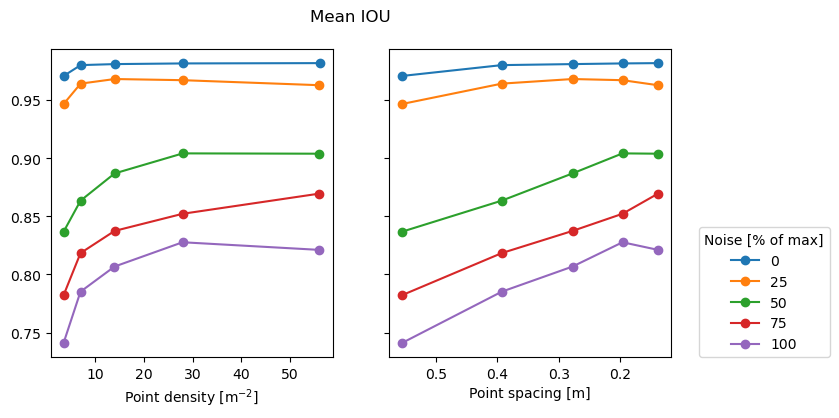

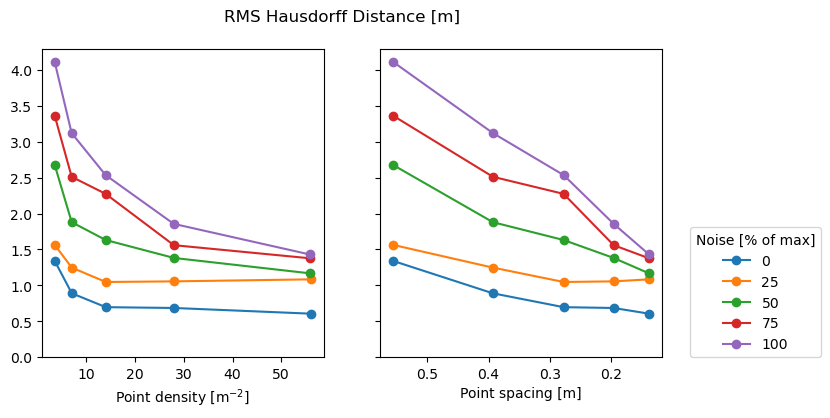

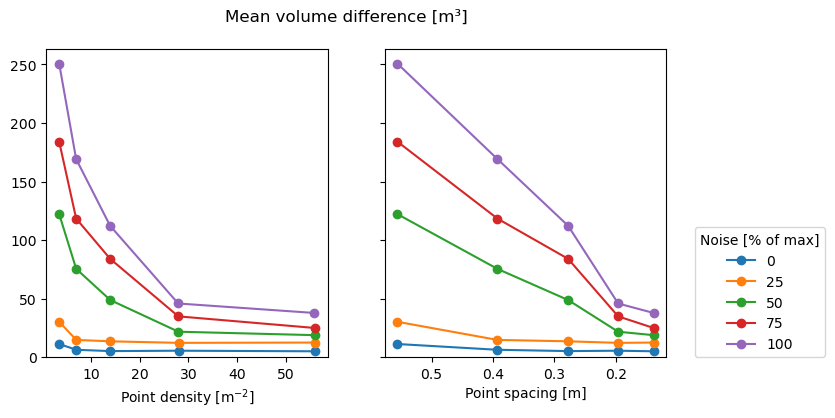

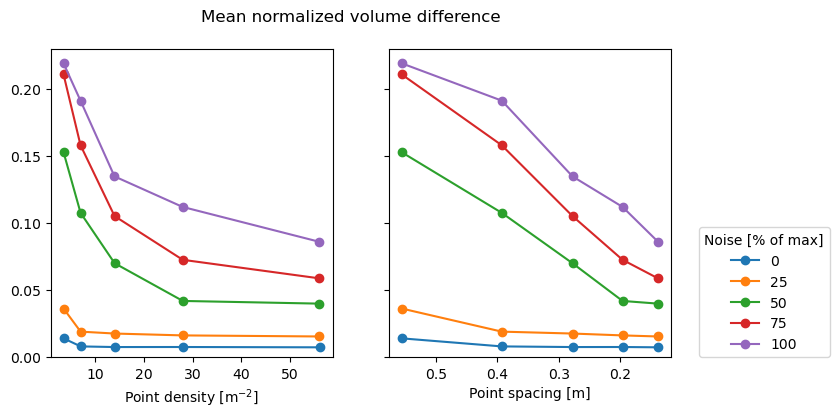

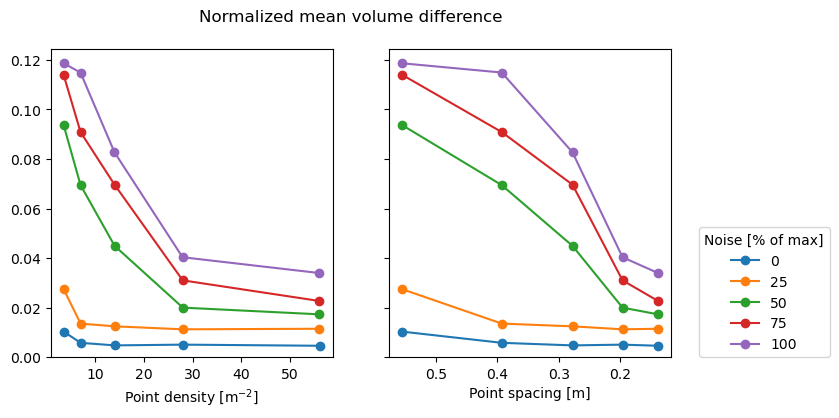

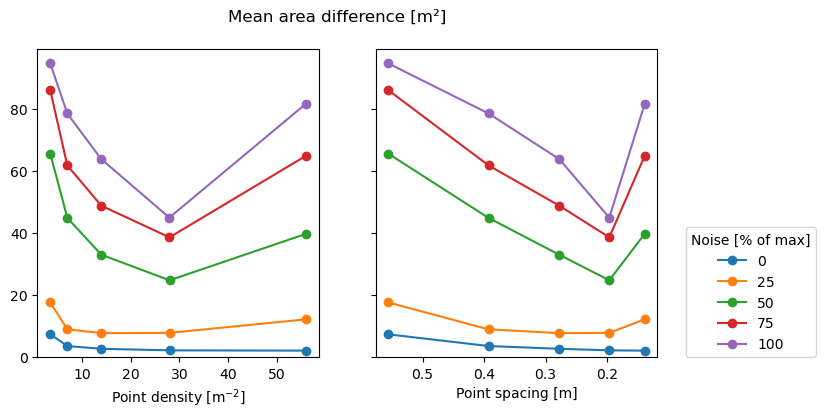

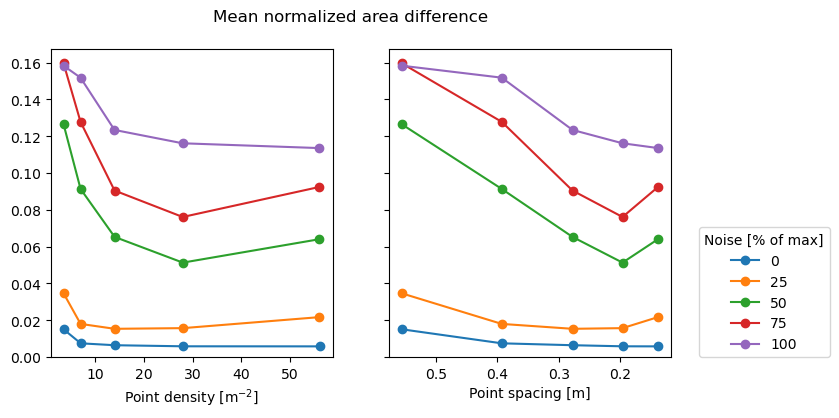

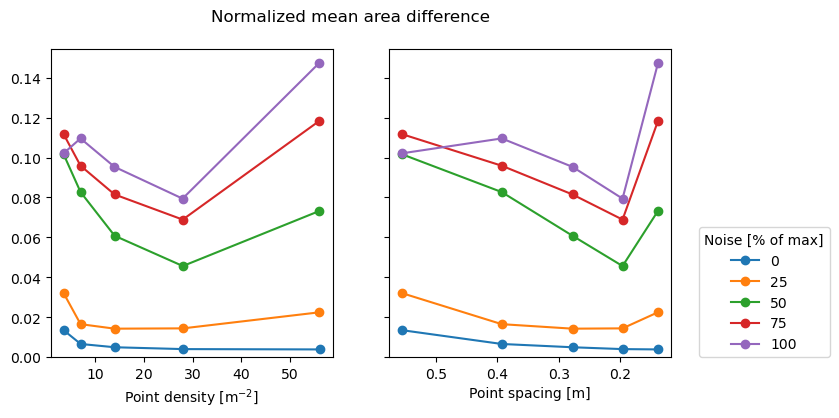

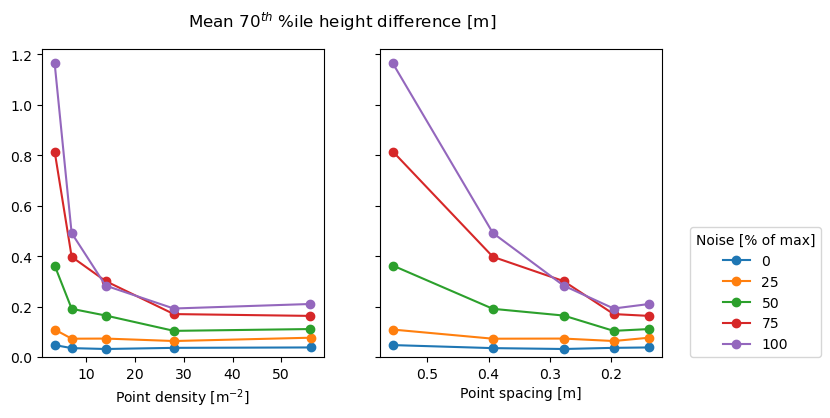

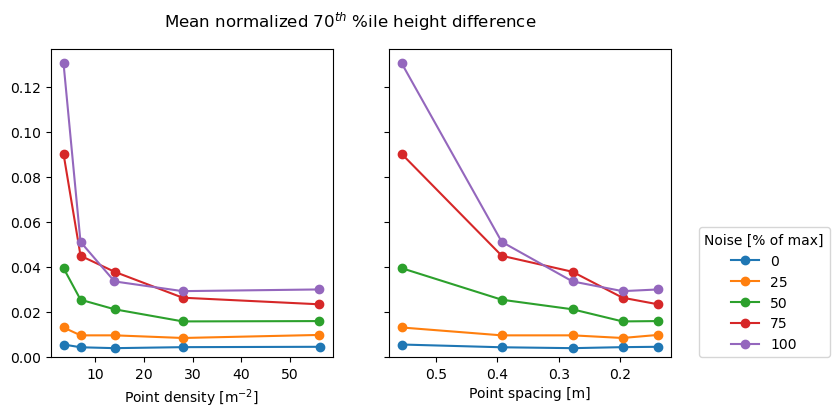

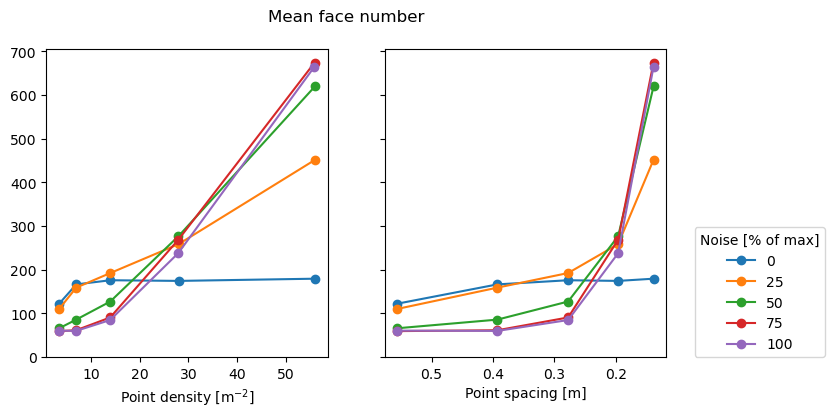

In [105]:
xs = ["density_overall", "point_spacing_along"]
ys = ["iou_22_mean", "hausdorff_22_rms", "volume_22_mean_abs_diff", "volume_22_mean_norm_abs_diff", "volume_22_norm_mean_abs_diff", "area_22_mean_abs_diff", "area_22_mean_norm_abs_diff", "area_22_norm_mean_abs_diff", "h_70p_mean_abs_diff", "h_70p_mean_norm_abs_diff", "n_faces_22_mean"]
# eval_plot_multi(xs, ys)

for y in ys:
    eval_plot_row(xs, y, title=True)

In [ ]:
fig, ax = plt.subplots()
eval_plot(ax, "n_faces_22_mean", "area_diff_22_mean_abs")

## Graphical evaluation: Manual evaluation results

In [ ]:
e.setup()
e.run_step(Scenario.setup_evaluation)
# e.setup_input_evaluation()

In [ ]:
for name, s in e.scenarios.items():
    print(get_config_item(s.config, "pulse_freq_hz"))
    print(get_config_item(s.config, "std_horizontal_error"))

In [ ]:
# Accessing individual evaluators' results
e.scenarios["scenario_024"].evaluators["hausdorff"].results["hausdorff.22"].mean()

In [ ]:
e.scenarios["scenario_000"].evaluators["hausdorff"].results

In [ ]:
# Accessing input evaluators' results
e.input_evaluators["area_volume"].results

In [ ]:
# todo: remove
# # Computing area or volume difference between input and reconstructed models
# area_volume_df = pd.merge(
#     e.input_evaluators["area_volume"].results,
#     e.scenarios["scenario_024"].evaluators["area_volume"].results,
#     left_on="identificatie",
#     right_on="identificatie",
#     suffixes=("_in", "_out")
# )
# 
# (area_volume_df["fme_area_22_in"] - area_volume_df["fme_area_22_out"]).mean()
# # (e.input_evaluators["area_volume"].results["fme_area_22"] - e.scenarios["scenario_024"].evaluators["area_volume"].results["fme_area_22"])

In [ ]:
rows = []

for name, s in e.scenarios.items():
    # todo: remove
    # area_volume_df = pd.merge(
    #     e.input_evaluators["area_volume"].results,
    #     s.evaluators["area_volume"].results,
    #     left_on="identificatie",
    #     right_on="identificatie",
    #     suffixes=("_in", "_out")
    # )
    # area_volume_df = pd.merge(
    #     s.evaluators["area_volume_diff"].area_volume_evaluator_1.results,
    #     s.evaluators["area_volume_diff"].area_volume_evaluator_2.results,
    #     left_on="identificatie",
    #     right_on="identificatie",
    #     suffixes=("_in", "_out")
    # )
    
    cols = {
        "name": name,
        "pulse_freq_hz": get_config_item(s.config, "pulse_freq_hz"),
        "density_overall": s.evaluators["point_density"].results.loc["overall", "density"],
        "density_buildings": s.evaluators["point_density"].results.loc["buildings", "density"],
        "point_spacing_along": point_spacing_along(velocity, get_config_item(s.config, "scan_freq_hz")),
        "point_spacing_across": point_spacing_across(altitude, scan_angle_deg, get_config_item(s.config, "pulse_freq_hz"), get_config_item(s.config, "scan_freq_hz")),
        "std_horizontal_error": get_config_item(s.config, "std_horizontal_error"),
        "std_vertical_error": get_config_item(s.config, "std_vertical_error"),
        "std_fraction_of_max": get_config_item(s.config, "std_horizontal_error") / std_horizontal_max,
        "point_mesh_distance_rms": s.evaluators["point_mesh_distance"].results.loc["buildings", "RMS"],
        "point_mesh_distance_mean": s.evaluators["point_mesh_distance"].results.loc["buildings", "mean"],
        "hausdorff_rms": rms(s.evaluators["hausdorff"].results["hausdorff.22"]),
        "hausdorff_mean": s.evaluators["hausdorff"].results["hausdorff.22"].mean(),
        "iou_rms": rms(e.scenarios[name].evaluators["iou_3d"].results["IOU_22"]),
        "iou_mean": e.scenarios[name].evaluators["iou_3d"].results["IOU_22"].mean(),
        "area_mean": e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_out"].mean(),
        "volume_mean": e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_out"].mean(),
        "area_mean_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_diff"].mean(),
        "area_median_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_diff"].median(),
        "area_mean_abs_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_diff"].abs().mean(),
        "area_median_abs_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_diff"].abs().median(),
        "area_rms_diff": rms(e.scenarios[name].evaluators["area_volume_diff"].results["fme_area_22_diff"]),
        "volume_mean_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_diff"].mean(),
        "volume_median_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_diff"].median(),
        "volume_mean_abs_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_diff"].abs().mean(),
        "volume_median_abs_diff": e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_diff"].abs().median(),
        "volume_rms_diff": rms(e.scenarios[name].evaluators["area_volume_diff"].results["fme_volume_22_diff"]),
        # todo: remove - this is now handled by AreaVolumeDifferenceEvaluator
        # "area_mean_2": e.scenarios[name].evaluators["area_volume_diff"].area_volume_evaluator_2.results["fme_area_22"].mean(),
        # "volume_mean_2": e.scenarios[name].evaluators["area_volume_diff"].area_volume_evaluator_2.results["fme_volume_22"].mean(),
        # "area_mean_diff_2": (area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"]).mean(),
        # "area_mean_abs_diff_2": (area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"]).abs().mean(),
        # "area_median_abs_diff_2": (area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"]).abs().median(),
        # "area_rms_diff_2": rms(area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"]),
        # "volume_mean_diff_2": (area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"]).mean(),
        # "volume_mean_abs_diff_2": (area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"]).abs().mean(),
        # "volume_median_abs_diff_2": (area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"]).abs().median(),
        # "volume_rms_diff_2": rms(area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"]),
    }
    rows.append(cols)

eval_results = pd.DataFrame(rows).set_index("name")

In [ ]:
eval_results

In [ ]:
eval_results[eval_results.std_fraction_of_max == 0.5]

In [ ]:
eval_results[eval_results.pulse_freq_hz == 250000]

In [ ]:
list(eval_results.columns)

### Scatter plots

In [ ]:
fig, ax = plt.subplots() 
for name, group in eval_results.groupby("pulse_freq_hz"):
    ax.plot(group.std_fraction_of_max, group.point_mesh_distance_rms, marker="o", label=str(name))
ax.legend()
plt.show()

In [ ]:
def eval_plot(ax, x, y, error_steps=error_steps):
    for i, fraction in enumerate(error_steps):
        slice = eval_results[eval_results.std_fraction_of_max == fraction]
        ax.plot(slice[x], slice[y], label=str(fraction), marker="o")
    
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    
    if y in ["hausdorff_rms", "hausdorff_mean", "area_mean_abs_diff", "volume_mean_abs_diff"]:
        ax.set_ylim(bottom=0)
    
    if x in ["point_spacing_along", "point_spacing_across"]:
        ax.xaxis.set_inverted(True)

In [ ]:
def eval_plot_multi(xs, ys):
    fig, axs = plt.subplots(nrows=len(ys), ncols=len(xs), sharex="col", sharey="row", figsize=(4*len(xs), 4*len(ys)))

    for i, y in enumerate(ys):
        for j, x in enumerate(xs):
            eval_plot(axs[i,j], x, y)

In [ ]:
xs = ["density_buildings", "point_spacing_along"]
ys = ["area_mean_abs_diff", "area_median_abs_diff", "area_rms_diff", "volume_mean_abs_diff", "volume_median_abs_diff", "volume_rms_diff"]

eval_plot_multi(xs, ys)

In [ ]:
fig, ax = plt.subplots()
eval_plot(ax, "pulse_freq_hz", "area_mean_abs_diff")

In [ ]:
fig, ax = plt.subplots()
eval_plot(ax, "pulse_freq_hz", "point_spacing_across")

In [ ]:
xs = ["density_buildings", "point_spacing_along"]
# y = "iou_mean"
ys = ["iou_mean", "hausdorff_rms", "area_mean_abs_diff", "area_median_abs_diff", "volume_mean_abs_diff", "volume_median_abs_diff"]

eval_plot_multi(xs, ys)

### Histograms

In [ ]:
# Trying to identify the building in scenario_024 that has the extreme area_abs_diff of over 1000 m².
# Turns out: NL.IMBAG.Pand.0503100000028983
name = "scenario_024"
area_volume_df = pd.merge(
        e.input_evaluators["area_volume"].results,
        e.scenarios[name].evaluators["area_volume"].results,
        left_on="identificatie",
        right_on="identificatie",
        suffixes=("_in", "_out")
    )
area_volume_df["area_diff"] = area_volume_df.fme_area_22_out - area_volume_df.fme_area_22_in
area_volume_df["area_abs_diff"] = (area_volume_df.fme_area_22_out - area_volume_df.fme_area_22_in).abs()
area_volume_df["volume_diff"] = area_volume_df.fme_volume_22_out - area_volume_df.fme_volume_22_in
area_volume_df["volume_abs_diff"] = (area_volume_df.fme_volume_22_out - area_volume_df.fme_volume_22_in).abs()
area_volume_df

In [ ]:
# Relation of area and volume difference
plt.scatter(area_volume_df.area_diff, area_volume_df.volume_diff)
plt.show()

In [ ]:
# Relation of area and volume difference
plt.scatter(eval_results.area_diff, area_volume_df.volume_diff)
plt.show()

In [ ]:
scenario_names = [f"scenario_{i:03}" for i in range(25)]

iou_22 = [e.scenarios[name].evaluators["iou_3d"].results["IOU_22"] for name in scenario_names]
hausdorff_22 = [e.scenarios[name].evaluators["hausdorff"].results["hausdorff.22"] for name in scenario_names]

volume_diffs, volume_abs_diffs, area_diffs, area_abs_diffs = [[] for i in range(4)]
for name in scenario_names:
    area_volume_df = pd.merge(
        e.input_evaluators["area_volume"].results,
        e.scenarios[name].evaluators["area_volume"].results,
        left_on="identificatie",
        right_on="identificatie",
        suffixes=("_in", "_out")
    )
    volume_diffs.append(area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"])    
    volume_abs_diffs.append(volume_diffs[-1].abs())
    area_diffs.append(area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"])    
    area_abs_diffs.append(area_diffs[-1].abs())

In [ ]:
def hist_grid(data, names, shape=(5, 5), title=None, bins=30):
    n_rows, n_cols = shape
    names_layout = np.array(names).reshape(shape, order="F")
    
    # Function to get 1-dim list position from row and column
    def iloc(row, col):
        return row + n_rows * col
    
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, sharex="col", figsize=(5*n_cols, 3*n_rows))
    
    for col in range(n_cols):
        # Get identical bins for all data series in this column
        bins_np = np.histogram(
            pd.concat(
                data[iloc(0, col) : iloc(n_rows, col)]
            ).dropna(),
            bins=bins
        )[1]  # get the bin boundaries
        
        for row in range(n_rows):
            axs[row, col].hist(data[iloc(row, col)], bins=bins_np)
            axs[row, col].set_title(names_layout[row, col])
    
    if title is not None:
        fig.suptitle(title)
    plt.show()

titles = [f"{name} – D: {eval_results.density_buildings[name]:.1f}, A: {eval_results.std_fraction_of_max[name]}" for name in scenario_names]

hist_grid(area_diffs, titles, bins=25)

In [ ]:
np.array(scenario_names).reshape((5, 5), order="F")

In [ ]:
scenario_names = [f"scenario_{2+5*i:03}" for i in range(5)]
scenario_names = [f"scenario_{5+i:03}" for i in range(5)]

def hist_multi(data, names, title=None, bins=30):
    bins_np = np.histogram(pd.concat(data).dropna(), bins=bins)[1]  # get the bin boundaries
    fig, axs = plt.subplots(len(data), 1, sharex=True, sharey=False, figsize=(5, 3*len(data)))
    for i, series in enumerate(data):
        axs[i].hist(series, bins=bins_np)
        axs[i].set_title(names[i])
    if title is not None:
        fig.suptitle(title)
    plt.show()

iou_22 = [e.scenarios[name].evaluators["iou_3d"].results["IOU_22"] for name in scenario_names]
hausdorff_22 = [e.scenarios[name].evaluators["hausdorff"].results["hausdorff.22"] for name in scenario_names]

volume_diffs, volume_abs_diffs, area_diffs, area_abs_diffs = [[] for i in range(4)]
for name in scenario_names:
    area_volume_df = pd.merge(
        e.input_evaluators["area_volume"].results,
        e.scenarios[name].evaluators["area_volume"].results,
        left_on="identificatie",
        right_on="identificatie",
        suffixes=("_in", "_out")
    )
    volume_diffs.append(area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"])    
    volume_abs_diffs.append(volume_diffs[-1].abs())
    area_diffs.append(area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"])    
    area_abs_diffs.append(area_diffs[-1].abs())

hist_multi(area_diffs, scenario_names, bins=25)

In [ ]:
scenario_names = [f"scenario_{2+5*i:03}" for i in range(5)]
scenario_names = [f"scenario_{5+i:03}" for i in range(5)]

plt.hist([e.scenarios[name].evaluators["iou_3d"].results["IOU_22"] for name in scenario_names], label=scenario_names)
plt.title("IOU")
plt.legend()
plt.show()

plt.hist([e.scenarios[name].evaluators["hausdorff"].results["hausdorff.22"] for name in scenario_names], label=scenario_names)
plt.title("Hausdorff distance")
plt.legend()
plt.show()

volume_diffs, volume_abs_diffs, area_diffs, area_abs_diffs = [[] for i in range(4)]
for name in scenario_names:
    area_volume_df = pd.merge(
        e.input_evaluators["area_volume"].results,
        e.scenarios[name].evaluators["area_volume"].results,
        left_on="identificatie",
        right_on="identificatie",
        suffixes=("_in", "_out")
    )
    volume_diffs.append(area_volume_df["fme_volume_22_out"] - area_volume_df["fme_volume_22_in"])    
    volume_abs_diffs.append(volume_diffs[-1].abs())
    area_diffs.append(area_volume_df["fme_area_22_out"] - area_volume_df["fme_area_22_in"])    
    area_abs_diffs.append(area_diffs[-1].abs())

plt.hist(volume_diffs, label=scenario_names)
plt.title("Volume difference")
plt.legend()
plt.show()

plt.hist(volume_abs_diffs, label=scenario_names)
plt.title("Volume difference (absolute value)")
plt.legend()
plt.show()

plt.hist(area_diffs, label=scenario_names)
plt.title("Area difference")
plt.legend()
plt.show()

plt.hist(area_abs_diffs, label=scenario_names)
plt.title("Area difference (absolute value)")
plt.legend()
plt.show()